# About glass transition calculation

In order to calculate the glass transition, we need to integrate the equations
$$\text{C}_p = 3k_B + aT^2 + \frac{b}{T^2},$$
and 
$$\text{C}_p = 3k_B + cT + dT^2,$$
and fit enthalpy's data obtained of the molecular dynamics simulation. The glass transition temperature is estimed as the intersection point for two fitting curves

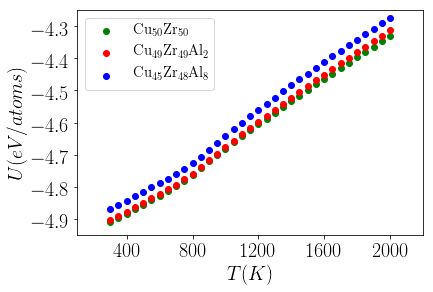

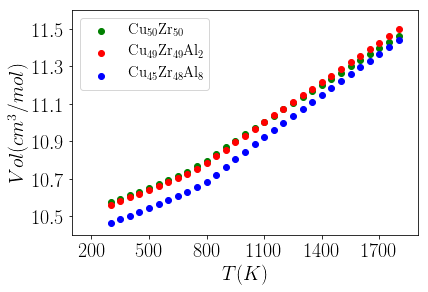

In [2]:
#**************************************************************************************************
#                        Importing libraries and font formating
#**************************************************************************************************

import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family = 'Sans', serif = 'Computer Modern Roman', size = 18)
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

#**************************************************************************************************
#                        Importing data from MD simulation (LAMMPS)
#**************************************************************************************************

T, Vol, dU = np.loadtxt('cooling_CuZr50.dat', unpack=True,usecols=[0,1,3])
T_Al, V_Al, dU_Al = np.loadtxt('cooling_CuZrAl8.dat', unpack=True,usecols=[0,1,3])
T_Al2, V_Al2, dU_Al2 = np.loadtxt('cooling_CuZrAl2.dat', unpack=True,usecols=[0,1,3])

#**************************************************************************************************
#                                      Data plot
#**************************************************************************************************

#----------------------------------------- Enthalpy -----------------------------------------------

fig = plt.figure()
ax = fig.add_axes([0.19, 0.17, 0.8, 0.78])
ax.set_xlim(100,2200)
ax.set_ylim(-4.95, -4.25)
ax.set_yticks(np.arange(-4.9, -4.3, 0.1))
ax.set_xticks(np.arange(400,2400, 400))
ax.plot(T,dU,'go',label='Cu$_{50}$Zr$_{50}$')
ax.plot(T_Al2,dU_Al2,'ro',label='Cu$_{49}$Zr$_{49}$Al$_{2}$')
ax.plot(T_Al,dU_Al,'bo',label='Cu$_{45}$Zr$_{48}$Al$_{8}$')
ax.set_facecolor('white')
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.xlabel('$T(K)$',fontsize=20)
plt.ylabel('$U(eV/atoms) $',fontsize=20)
ax.legend(loc = 'best', fancybox = True, shadow = True)
ax.legend(loc=2,prop={'size':15})
plt.show()
fig.clf()

#------------------------------------------ Volume ------------------------------------------------

fig = plt.figure()
ax = fig.add_axes([0.18, 0.17, 0.8, 0.78])
ax.set_xlim(100, 1900)
ax.set_ylim(10.4, 11.6)
ax.set_yticks(np.arange(10.5, 11.6, 0.2))
ax.set_xticks(np.arange(200,2000, 300))
ax.plot(T[4:],Vol[4:],'go',label='Cu$_{50}$Zr$_{50}$')
ax.plot(T_Al2[4:],V_Al2[4:],'ro',label='Cu$_{49}$Zr$_{49}$Al$_{2}$')
ax.plot(T_Al[4:],V_Al[4:],'bo',label='Cu$_{45}$Zr$_{48}$Al$_{8}$',)
ax.set_facecolor('white')
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.xlabel('$T(K)$',fontsize=20)
plt.ylabel('$Vol(cm^3/mol) $',fontsize=20)
ax.legend(loc = 'best', fancybox = True, shadow = True)
ax.legend(loc=2,prop={'size':15})
fig.savefig("Volume.pdf",facecolor='white', edgecolor='white')
plt.show()
fig.clf()


# Fit the data

the liquid fit equation is used in the interval of 1400 - 900 k, and solid fit in 500 - 300 K

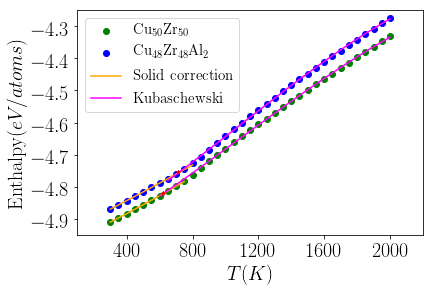

In [9]:
#---------------Boltzmann constant---------------------

from scipy.optimize import curve_fit
kb = 8.617e-5

#---------------Solid correction-----------------------

def solid(T, a, b, c):
    H = 3*kb*T + a*T**2/2.0 - b/T + c
    return H

#---------------Kubaschewski relation------------------

def liquid(T, a, b, c):
    H = 3*kb*T + a*T**2/2.0 + b*T**3/3.0 + c
    return H

#---------------fitting the data------------------

fit1, cov1 = curve_fit(solid, T[27:], dU[27:])
fit2, cov2 = curve_fit(liquid, T[:25], dU[:25])
fit1_Al8, cov1 = curve_fit(solid, T_Al[27:], dU_Al[27:])
fit2_Al8, cov2 = curve_fit(liquid, T_Al[:25], dU_Al[:25])
fig = plt.figure()
ax = fig.add_axes([0.19, 0.17, 0.8, 0.78])
ax.set_xlim(100,2200)
ax.set_ylim(-4.95, -4.25)
ax.set_yticks(np.arange(-4.9, -4.3, 0.1))
ax.set_xticks(np.arange(400,2400, 400))
ax.plot(T,dU,'go',label='Cu$_{50}$Zr$_{50}$')
ax.plot(T_Al,dU_Al,'bo',label='Cu$_{48}$Zr$_{48}$Al$_{2}$')
ax.plot(T_Al[24:], solid(T_Al, *fit1_Al8)[24:], color='orange')
ax.plot(T_Al[:28], liquid(T_Al, *fit2_Al8)[:28], 'magenta')
ax.plot(T[25:], solid(T, *fit1)[25:], color='orange',label='Solid correction')
ax.plot(T[:29], liquid(T, *fit2)[:29], 'magenta',label='Kubaschewski')
ax.plot(623.445,-4.82, 'r*', markersize=4)
ax.plot(713.523,-4.755, 'r*', markersize=4)
plt.xlabel('$T(K)$',fontsize=20)
plt.ylabel('Enthalpy$(eV/atoms) $',fontsize=20)
ax.legend(loc = 'best', fancybox = True, shadow = True)
ax.legend(loc=2,prop={'size':15})
ax.set_facecolor('white')
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
fig.savefig("Tg_calc.pdf",facecolor='white', edgecolor='white')
plt.show()


# Heat capacity

we can be calculate the heat capacity for completeness differentiating the enthalpy. The data were smoothing using the "Savitzky Golay Filtering", for moreiformation see: Smoothing and Differentiation of Data by Simplified Least Squares Procedures, Anal. Chem. 36 (1964) 1627. 

/home/rene/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


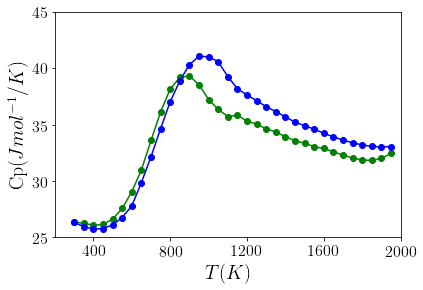

In [6]:
from scipy.signal import savgol_filter
Cp =  np.diff(dU)/np.diff(T)
Cp_smooth = savgol_filter(Cp, 15,4)
Cp_Al =  np.diff(dU_Al)/np.diff(T_Al)
Cp_Alsmoo = savgol_filter(Cp_Al, 13,3)
fig = plt.figure()
ax = fig.add_axes([0.18, 0.17, 0.8, 0.78])
ax.set_xlim(200, 2000)
ax.set_ylim(25, 45)
ax.set_xticks(np.arange(400,2400, 400))
ax.set_yticks(np.arange(25, 50, 5))
#ax.plot(T[1:],Cp*96472.44,'go-')
ax.plot(T[1:],Cp_smooth*96472.44,'go-')
ax.plot(T_Al[1:],Cp_Alsmoo*96472.44,'bo-')
plt.xlabel('$T(K)$',fontsize=20)
plt.ylabel('Cp$(J mol^{-1}/K) $',fontsize=20)
#ax.plot(T_Al[1:],Cp_Al*96472.44,'bo-')
fig.savefig("heat_capacity.pdf",facecolor='white', edgecolor='white')
plt.show()